# ML LAB2 (20BCE2920)

# Importing data and needed libraries

In [23]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
data = load_breast_cancer()
type(data)

sklearn.utils.Bunch

# Preparing the data for modeling

In [25]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

In [26]:
X = df.drop('Target',axis=1)
y = df['Target']

In [27]:
print(df.shape)
print(X.shape)
print(y.shape)

(569, 31)
(569, 30)
(569,)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (455, 30)
X_test:  (114, 30)
y_train:  (455,)
y_test:  (114,)


# Building the model and evaluating it

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree

In [31]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
pred_dtree = dtree.predict(X_test)

In [33]:
tn, fp, fn, tp = confusion_matrix(y_test, pred_dtree).ravel()

In [34]:
print(" accuracy = ", accuracy_score(y_test, pred_dtree))
print(" f1_score = ", f1_score(y_test, pred_dtree))
print("Precision = \t\t", tp/(tp+fp))
print("Recall/Sensitivity = \t", tp/(tp + fn))
print("Specivity = \t\t", tn/(tn + fp))
print("\nClassification Matrix")
print(confusion_matrix(y_test, pred_dtree))
print(classification_report(y_test, pred_dtree))

 accuracy =  0.9210526315789473
 f1_score =  0.9361702127659575
Precision = 		 0.9428571428571428
Recall/Sensitivity = 	 0.9295774647887324
Specivity = 		 0.9069767441860465

Classification Matrix
[[39  4]
 [ 5 66]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        43
           1       0.94      0.93      0.94        71

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



# Visualising the Decision Tree

In [35]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_23 <= 884.55
|   |--- feature_27 <= 0.16
|   |   |--- feature_7 <= 0.05
|   |   |   |--- feature_13 <= 48.70
|   |   |   |   |--- feature_20 <= 16.83
|   |   |   |   |   |--- feature_21 <= 33.35
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_21 >  33.35
|   |   |   |   |   |   |--- feature_21 <= 33.56
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_21 >  33.56
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_20 >  16.83
|   |   |   |   |   |--- feature_8 <= 0.16
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_8 >  0.16
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_13 >  48.70
|   |   |   |   |--- feature_25 <= 0.08
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_25 >  0.08
|   |   |   |   |   |--- class: 1
|   |   |--- feature_7 >  0.05
|   |   |   |--- feature_1 <= 21.06
|   |   |   |   |--- feature_7 <= 0.05
|   |   |   |   |   |--- class: 0

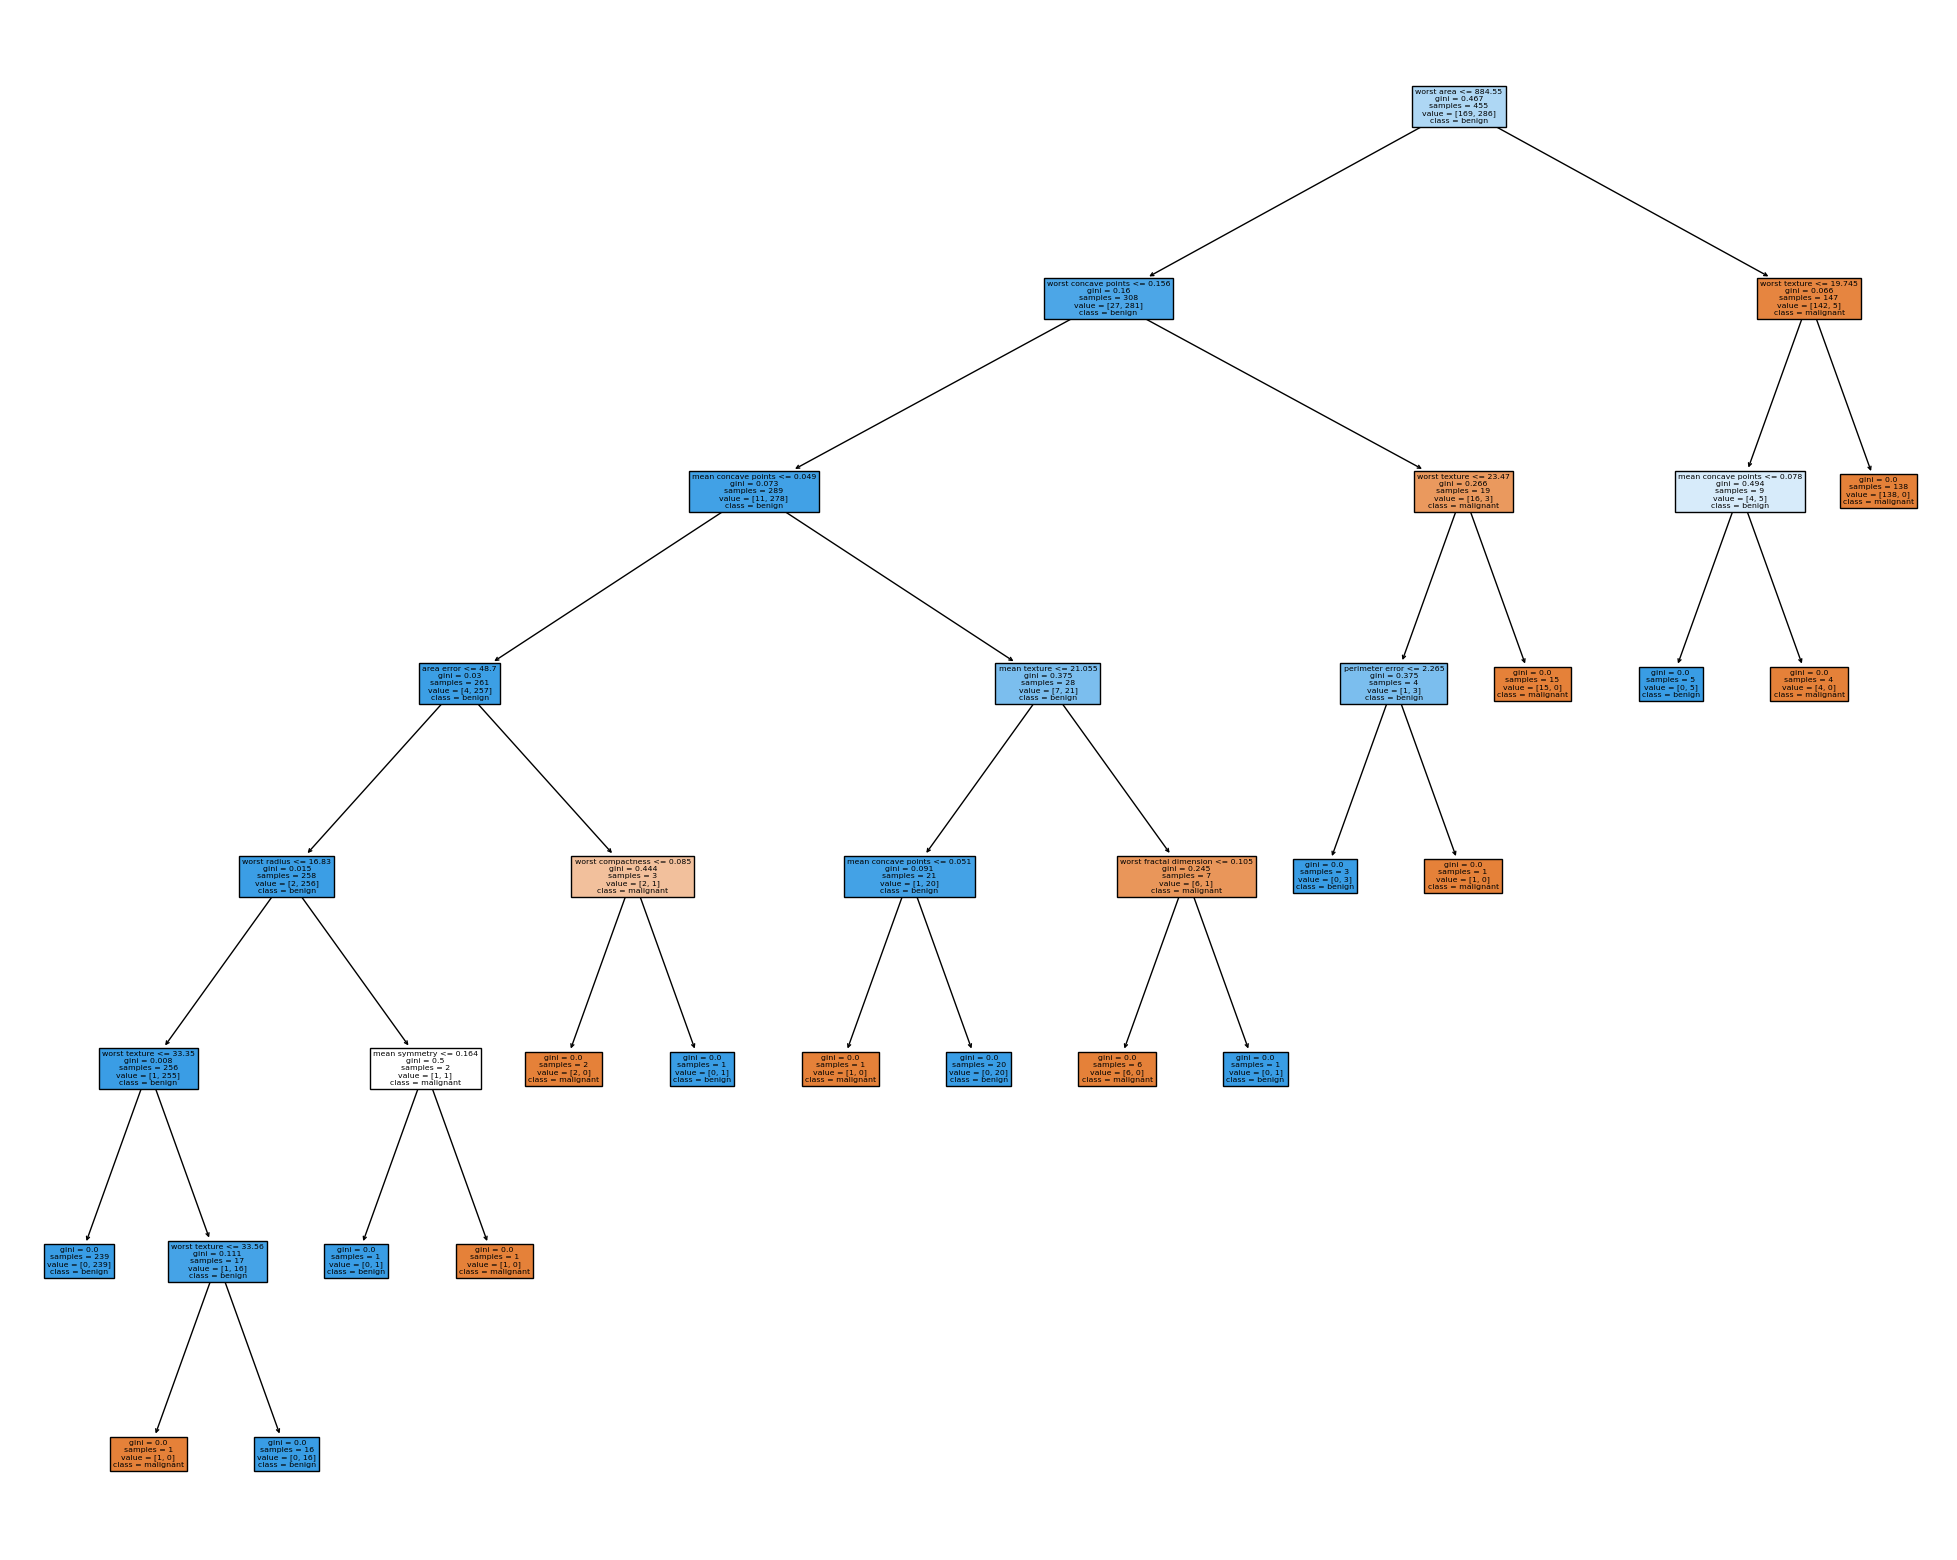

In [36]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=data.feature_names,  
                   class_names=data.target_names,
                   filled=True)